In this simple demonstration the realized voltality of the Alcoa stock is used as a mean toward verifying the results obtained here are conforming to the results obtained by the author in the textbook:
 Analysis of Financial Time Series by R.S. TSAY 

The text file for the data can be downloaded from

 https://faculty.chicagobooth.edu/ruey-s-tsay/research/analysis-of-financial-time-series-3rd-edition

Realized voltality is when the log returns of the asset at high frequencey (usually minutes) are used to estimate the daily voltality of the asset.

Here the sequence of the high frequency log returns $ \{ r_{t,i}\} $ where t is the number of days, and i is the index used for the high frequency period, in this case it is the 10-minutes returns. The sequence is i.i.d drawn from a normal with mean zero and finite variance.

The daily return is given by $ r_{t} = \sum_{i = 1}^{n}{r_{t,i}} $.

The estimated realized daily voltality is given by the sample average of the 10-mins log returns.
$$ RV_t = \sum_{i = 1}^{n}{r_{t,i}^2},$$

Again the distribution of this $\{ RV_t \}_{t =1}^{T}$ is still not known, but limited experinece indicate that $\{ln RV_t\}_{t=1}^{T}$ is Gaussian, that is the logaritms of realized voltality behaves as a Gaussian.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import minimize

In [3]:
data = pd.read_csv('Alcoa Realized Voltality.csv')
data.head(10)

,Index,5-mins,10-mins,20-mins
0,1,3.3635,3.4745,3.0692
1,2,4.3848,4.1470,6.7121
2,3,1.5408,1.2124,0.5711
3,4,1.7437,1.8723,2.1220
4,5,107.0411,11.0797,14.5181
5,6,3.3061,3.2015,3.3030
6,7,5.7399,5.8178,2.7650
7,8,3.0006,2.1940,1.9447
8,9,2.9741,2.5970,1.4474
9,10,4.4040,5.9260,6.5017


In [4]:
data['log RVt'] = np.log(data['10-mins'])
data.head(5)

,Index,5-mins,10-mins,20-mins,log RVt
0,1,3.3635,3.4745,3.0692,1.245451
1,2,4.3848,4.1470,6.7121,1.422385
2,3,1.5408,1.2124,0.5711,0.192602
3,4,1.7437,1.8723,2.1220,0.627168
4,5,107.0411,11.0797,14.5181,2.405115


In [9]:
data['10-mins'] = data['10-mins'].astype(float)
data.dtypes

Index        int64
5-mins     float64
10-mins    float64
20-mins    float64
log RVt    float64
dtype: object

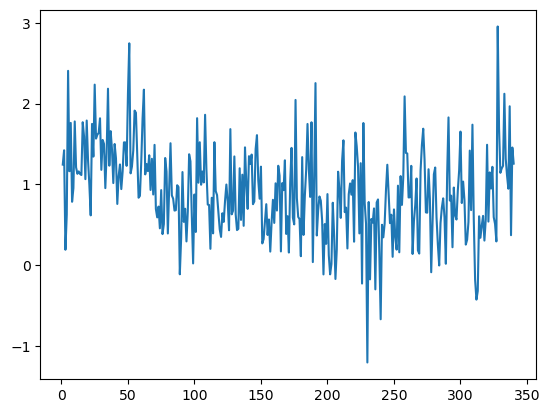

In [10]:
plt.plot(data['Index'], data['log RVt'])

The local level model is given by:
$$ y_t = \mu_{t} + \epsilon_t, \sim N(0, \sigma_{\epsilon}^2)$$
$$ \mu_{t} = \mu_{t-1} + \eta_t, \sim N(0, \sigma_{\eta}^2)$$ 


The conditional distribution of $\mu_{t}$ given information up to time t-1, that is $\mathcal{I}_{t-1}$. 
$$\mu_{t}|\mathcal{I}_{t-1} \sim N(\mu_{t|t-1}, \Sigma_{t|t-1})$$

Once the new observation at time t, becomes available $y_t$. This is identical to the prediction error as the difference between the state projection given past information $\mu_{t}|\mathcal{I}_{t-1}$ and  the observed quantity:

$$ v_t = y_t - \mu_{t|t-1} $$

The Variance of the prediction error is given by:
$$ V_t =Var(v_t|\mathcal{I}_{t-1}) = Var(y_t - \mu_{t|t-1}) = Var(\epsilon_{t} +\mu_{t|t-1}- \mu_{t|t-1}) = \sigma_{\epsilon}^2 +\Sigma_{t|t-1} $$

Now given the conditional distribution of $\mu_{t}|\mathcal{I}_{t-1}$ and the realization of the new information, what will be the conditional distribution of $\mu_{t}$ up to time t, i.e, $\mu_{t}|\mathcal{I}_{t-1}.$

This is given by the optimal constructor of one Gaussian given another:
Given $x \sim N(\mu_x,\Sigma_{x})$ and $y \sim N(\mu_y,\Sigma_{y})$ where the variances are kept as matrices for generality.


The conditional distribution of x given y is given by the theorem*:


$$E(x|y) = \mu_{x} + \Sigma_{x,y}\Sigma_{yy}^{-1}(y-\mu_{y})$$
$$Var(x|y) = \Sigma_{x,x} - \Sigma_{x,x}\Sigma_{y,y}^{-1} \Sigma_{y,x} $$

taking the two gaussians $\mu_t|\mathcal{I}_{t-1} \sim N(\mu_{t|t-1},\Sigma_{t|t-1} )$ and $v_t|\mathcal{I}_{t-1} \sim N(0,V_t)$ and applying theorem*:

$$E(\mu_{t}|\mathcal{I}_{t}) = \mu_{t|t-1} + \Sigma_{\mu_{t},v_{t}|\mathcal{I}_{t}} V_{t}^{-1}(y_t - \mu_{t|t-1}) $$
$$Var(\mu_{t}|\mathcal{I}_{t}) = \Sigma_{t|t-1} - \Sigma_{t|t-1} V_{t}^{-1}  \Sigma_{\mu_{t},v_{t}|\mathcal{I}_{t}}$$

The covariance between $\mu_t$ and $v_t$ is given without proof as $\Sigma_{\mu_{t},v_{t}|\mathcal{I}_{t}} = \Sigma_{t|t-1}$.

Then the optimal prediction of the state given its previuos state and the new information is:
$$\mu_{t|t} = \mu_{t|t-1} + \Sigma_{t|t-1}(y_t - \mu_{t|t-1})/V_t $$
$$\Sigma_{t|t} = \Sigma_{t|t-1} - \Sigma_{t|t-1}^{2} / V_{t} $$

The quantity $\Sigma_{t|t-1}/V_t = K_t$ is the kalman gain.

$$\mu_{t|t} = \mu_{t|t-1} + K_t(y_t - \mu_{t|t-1}) $$
$$\Sigma_{t|t} = \Sigma_{t|t-1} (1- K_t) $$

The final step is to project the state into the future that is given information up to time t, what is the conditioanl distribution of $\mu_{t+1}$ given $\mathcal{I}_{t}$.

$$\mu_{t+1|t} = E(\mu_{t} + \eta_t) = \mu_{t}$$
$$ \Sigma_{t+1|t} = Var(\mu_{t} + \eta_t) = \Sigma_{t|t} + \sigma_{\eta}^{2}$$



Once the initial starting point for the state $\mu_{1|0}$ and $\Sigma_{1|0}$ is identified the recurssions can be performed up to point T.
$$ v_1 = y_1 - \mu_{1|0} $$
$$ V_1 = \sigma_{\epsilon}^2 +\Sigma_{1|0} $$
$$K_1 = \Sigma_{1|0}/V_1 $$
$$\mu_{1|1} = \mu_{1|0} + K_1(y_1 - \mu_{1|0}) $$
$$\Sigma_{1|1} = \Sigma_{1|0} (1- K_1) $$
$$\mu_{2|1} =  \mu_{1|1}$$
$$ \Sigma_{2|1}  = \Sigma_{1|1} + \sigma_{\eta}^{2}$$

Then:
$$ v_2 = y_2 - \mu_{2|1} $$
$$ V_2 = \sigma_{\epsilon}^2 +\Sigma_{2|1} $$
$$K_2 = \Sigma_{2|1}/V_2 $$
$$\mu_{2|2} = \mu_{2|1} + K_2(y_2 - \mu_{2|1}) $$
$$\Sigma_{2|2} = \Sigma_{2|1} (1- K_2) $$
$$\mu_{3|2} =  \mu_{2|2}$$
$$ \Sigma_{3|2}  = \Sigma_{2|2} + \sigma_{\eta}^{2}$$
and so on:

$$..............$$


The prediction error $v_t$ is normal, therefore the log- likelihood can be written as:
$$ \ell(\sigma_{\epsilon}^2,\sigma_{\eta}^2;v_t) = -\frac{T}{2} \log(2\pi) - \frac{T}{2}\sum_{t=1}^{T}{\log(V_t)}  - \frac{1}{2} \sum{v_{t}^2/V_t} $$

In [11]:
def log_likelihood(p,y):
    sigma_eps2 = p[0]
    sigma_eta2 = p[1]
    v = np.zeros(len(y))
    mu = np.zeros(len(y))
    V =  np.zeros(len(y))
    S_var = np.zeros(len(y))
    K = np.zeros(len(y))
    mu[0] = 0
    S_var[0] = 1000
    v[0] = y[0]- mu[0]
    V[0] = S_var[0] + sigma_eps2
    K[0] = S_var[0]/V[0]


    for i in range(len(y)-1):
        mu[i+1] = mu[i] + K[i]*v[i]
        S_var[i+1] = S_var[i]*(1-K[i]) + sigma_eta2
        v[i+1] = y[i+1] - mu[i+1]
        V[i+1] = S_var[i+1] + sigma_eps2
        K[i+1] = S_var[i+1]/V[i+1]

    l = -0.5*(len(y))*np.log(2*np.pi) - 0.5*np.sum(np.log(V)) - 0.5*np.sum((v**2)/V)
    return -l

In [12]:
#Test the likelihood function:
p0 = [0.1,0.1]
ll = log_likelihood(p0, data['log RVt'])
ll

300.19936328893266

In [14]:
def constraint(p):
    sigma_eps2 = p[0]
    sigma_eta2 = p[1]
    return sigma_eps2,sigma_eta2

cons = { 'type' :'ineq' , 'fun' : constraint}

In [16]:
minimize(log_likelihood, p0, args= (data['log RVt']), constraints= cons, options={"maxiter": 1000})

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 263.34878746486163
       x: [ 2.307e-01  5.404e-03]
     nit: 18
     jac: [-8.282e-03 -3.553e-01]
    nfev: 76
    njev: 18

In [17]:
np.sqrt(2.307e-01)


0.4803123983409131

In [18]:
np.sqrt(5.404e-03)

0.07351190379795643

The results of the MLE estimations are:
$$ \sigma_{\epsilon}^2 = 0.2307 $$
$$ \sigma_{\eta}^2 = 0.0054 $$

Therefore the corresponding errors are:
$$\sigma_{\epsilon} = \sqrt{\sigma_{\epsilon}^2} = 0.4803$$
$$\sigma_{\eta} = \sqrt{\sigma_{\eta}^2} = 0.0735$$


The estimates are exactly identical to the results of the book, notiing that the observations error are greater than the state error, as the daily voltality estimates are contaminated by errors in high-frequency data, due to market micro-structures of bid-ask volumes.